In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
test_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"

In [4]:
batch_size = 32
img_size = (244, 244)
epochs = 20

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 32398 images belonging to 3 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 10500 images belonging to 3 classes.


In [9]:
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)
val_loss, val_acc = model.evaluate(test_generator)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

Epoch 1/20
1013/1013 [==============================] - 716s 706ms/step - loss: 0.1857 - accuracy: 0.9369 - val_loss: 0.1269 - val_accuracy: 0.9595
Epoch 2/20
1013/1013 [==============================] - 707s 698ms/step - loss: 0.1226 - accuracy: 0.9600 - val_loss: 0.1192 - val_accuracy: 0.9597
Epoch 3/20
1013/1013 [==============================] - 719s 709ms/step - loss: 0.1134 - accuracy: 0.9620 - val_loss: 0.1211 - val_accuracy: 0.9601
Epoch 4/20
1013/1013 [==============================] - 722s 712ms/step - loss: 0.1032 - accuracy: 0.9666 - val_loss: 0.0985 - val_accuracy: 0.9673
Epoch 5/20
1013/1013 [==============================] - 726s 716ms/step - loss: 0.0949 - accuracy: 0.9686 - val_loss: 0.1145 - val_accuracy: 0.9585
Epoch 6/20
1013/1013 [==============================] - 725s 715ms/step - loss: 0.0966 - accuracy: 0.9687 - val_loss: 0.1001 - val_accuracy: 0.9684
Epoch 7/20
1013/1013 [==============================] - 745s 735ms/step - loss: 0.0903 - accuracy: 0.9692 - val_

329/329 [==============================] - 179s 542ms/step


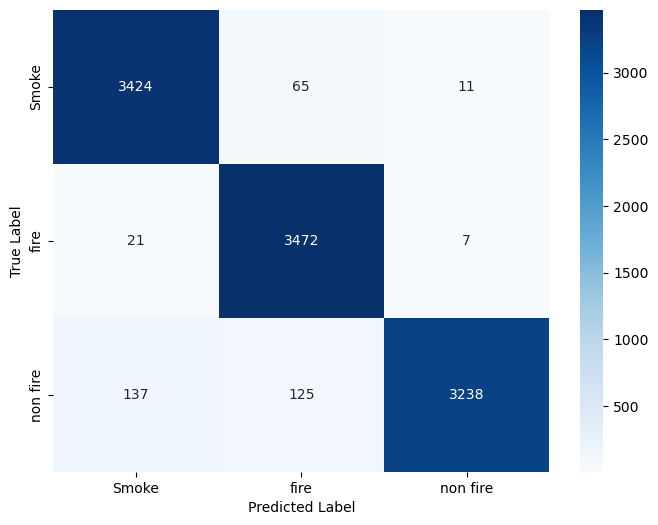

In [10]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       Smoke       0.96      0.98      0.97      3500
        fire       0.95      0.99      0.97      3500
    non fire       0.99      0.93      0.96      3500

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



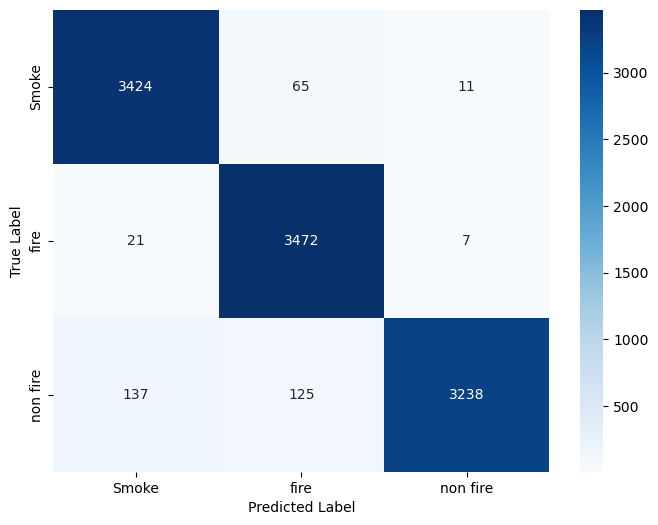

In [12]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels)

329/329 [==============================] - 178s 540ms/step
Predicted Labels: [0 0 0 ... 2 2 2]
